<a href="https://colab.research.google.com/github/slayerzeroa/Volatility_Tax/blob/main/Leverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader
!pip install yfinance

In [ ]:
import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 예시를 통한 Leverage 장기투자의 비효율성

- 삼성전자
- QQQ

In [ ]:
start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2023, 1, 1)
yf.pdr_override()

In [ ]:
# ticker = "QQQ"
ticker = "005930.KS"
df = pdr.get_data_yahoo(ticker, start, end)

df.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
df_chg = df.pct_change()
close_chg = df_chg['adj_close'].dropna()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
leverage_rate = 2

leverage_path = np.array([1000 for i in range(len(df['adj_close'])-1)]) * np.cumproduct((1+close_chg*(leverage_rate)))
leverage_path = np.append(1000, leverage_path)
leverage_path = pd.DataFrame(leverage_path, index=df.index)

Text(0.5, 1.0, '005930.KS 2X Leverage Path')

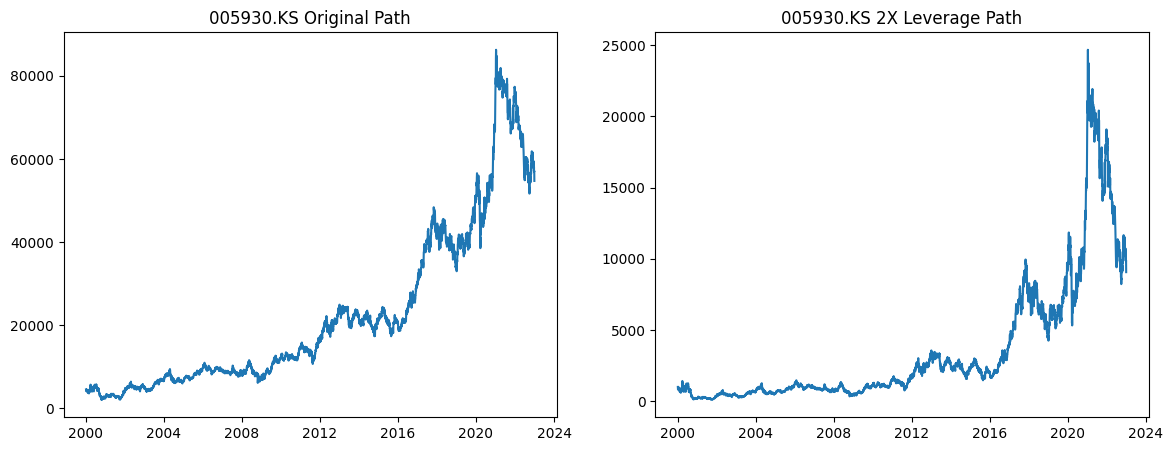

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df['adj_close'])
axes[0].set_title(f'{ticker} Original Path')

axes[1].plot(leverage_path)
axes[1].set_title(f'{ticker} {leverage_rate}X Leverage Path')

In [ ]:
print(f"no leverage 수익률은 {(df.adj_close[-1] - df.adj_close[0])/df.adj_close[0]*100}%, {leverage_rate}X 수익률은 {(leverage_path[0][-1] - leverage_path.iloc[0][0])/leverage_path[0][0] *100}% 입니다.")

no leverage 수익률은 1111.819991669786%, 2X 수익률은 805.852458823729% 입니다.


# 음의 복리 테스트, Volatility Tax 조정

In [ ]:
df = pd.DataFrame([100, 101]*20)

df.columns = ['Close']
df_chg = df.pct_change()
close_chg = df_chg.Close.dropna()

leverage_rate = -1

(close_chg*(leverage_rate))

leverage_path = np.array([100 for i in range(len(df.Close)-1)]) * np.cumproduct((1+close_chg*(leverage_rate)))
leverage_path = np.append(100, leverage_path)

Text(0.5, 1.0, '-1X Leverage Path')

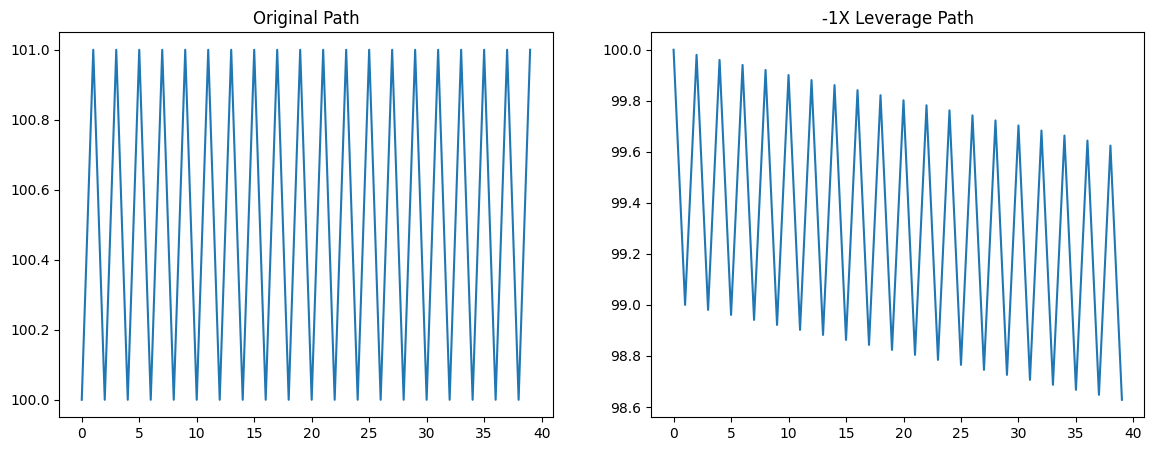

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df.Close)
axes[0].set_title("Original Path")

axes[1].plot(leverage_path)
axes[1].set_title(f'{leverage_rate}X Leverage Path')

In [ ]:
print(f"no leverage 수익률은 {(list(df.Close)[-1] - df.Close[0])/df.Close[0]*100}%, {leverage_rate}X 수익률은 {(leverage_path[-1] - leverage_path[0])/leverage_path[0] *100}% 입니다.")

no leverage 수익률은 1.0%, -1X 수익률은 -1.371812174539727% 입니다.


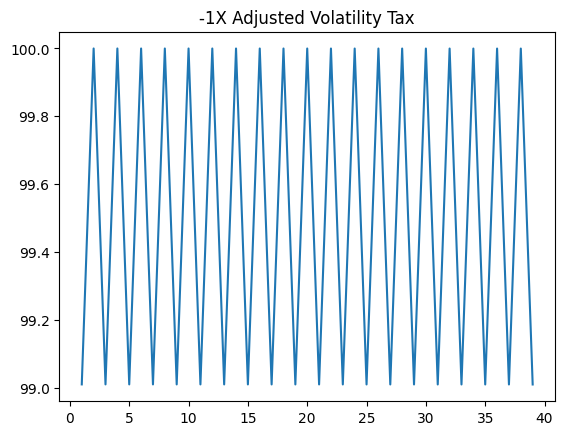

In [ ]:
vol_drag = np.std(df_chg)
vol_drag = float(vol_drag)**2
adj_chg_1 = df_chg*leverage_rate + vol_drag

# Volatility Tax 조정
df = np.array([100 for i in range(len(adj_chg_1.Close))]) * np.cumproduct((1+adj_chg_1.Close))

plt.title(f'{leverage_rate}X Adjusted Volatility Tax')
plt.plot(df)

# t=100, leverage, volatility tax 조정

In [ ]:
df_chg = pd.DataFrame([0.01, -0.01]*50)
df_chg.columns = ['Close']
df = np.array([100 for i in range(len(df_chg.Close))]) * np.cumproduct((1+df_chg.Close))

leverage_rate = 7
leverage_path = np.array([100 for i in range(len(df))]) * np.cumproduct((1+df_chg.Close*(leverage_rate)))
leverage_path = np.append(100, leverage_path)

Text(0.5, 1.0, '7X Leverage Path')

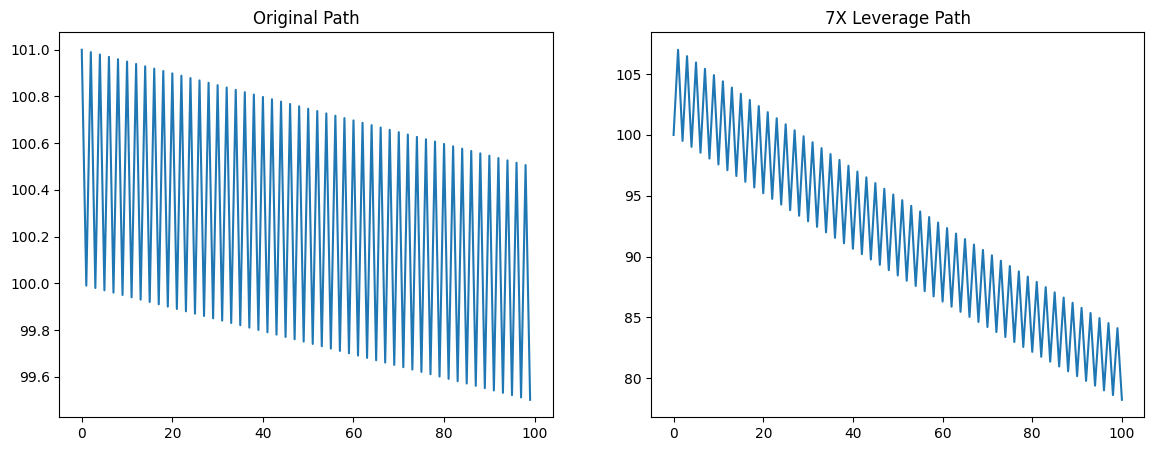

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df)
axes[0].set_title("Original Path")

axes[1].plot(leverage_path)
axes[1].set_title(f'{leverage_rate}X Leverage Path')

Text(0.5, 1.0, '7X Adjusted Tax Adjusted')

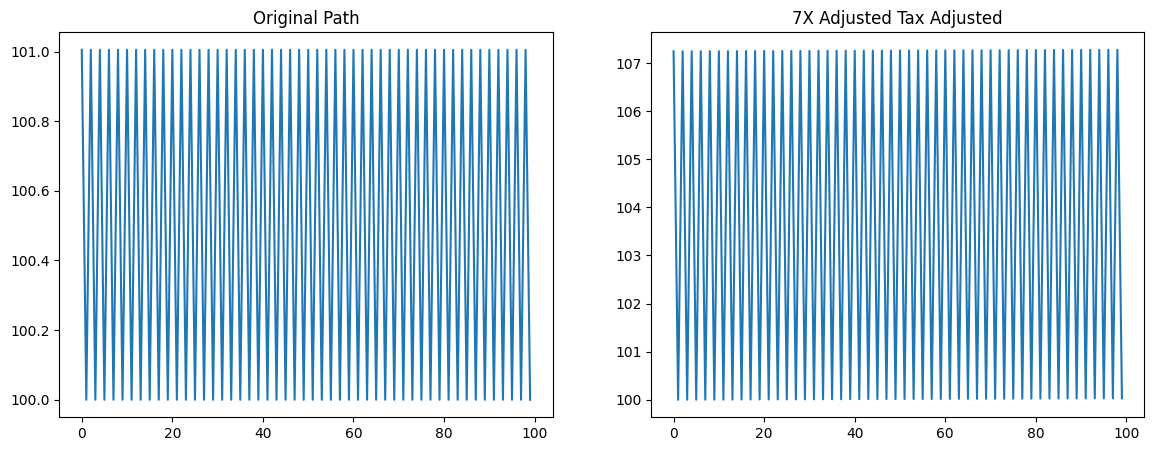

In [ ]:
# Volatility Tax 조정
vol_drag = np.std(df_chg)
vol_drag = float(vol_drag)**2/2
df_chg_org = df_chg + vol_drag
df = np.array([100 for i in range(len(df_chg_org.Close))]) * np.cumproduct((1+df_chg_org.Close))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(df)
axes[0].set_title("Original Path")

# Leverage Volatility Tax 조정
vol_drag = np.std(df_chg)
vol_drag = float(vol_drag)**2/2
df_chg_i = df_chg + vol_drag*(leverage_rate)
df = np.array([100 for i in range(len(df_chg_i.Close))]) * np.cumproduct((1+df_chg_i.Close*leverage_rate))

axes[1].plot(df)
axes[1].set_title(f'{leverage_rate}X Adjusted Tax Adjusted')